In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('winequality-White&red.csv')

In [ ]:
# number of rows & columns in the dataset
df.shape

(6497, 13)

In [ ]:
# first 5 rows of the dataset
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
pred_test = df.iloc[3]

In [ ]:
pred_test['type'] = 1
pred_test.drop(['quality','total sulfur dioxide'],inplace=True)
#pred_test.drop('total_sulfur_dioxide',inplace=True)
pred_test

C:\Users\venka\AppData\Local\Temp\ipykernel_12784\3520674449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_test['type'] = 1
C:\Users\venka\AppData\Local\Temp\ipykernel_12784\3520674449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_test.drop(['quality','total sulfur dioxide'],inplace=True)


type                        1
fixed acidity             7.2
volatile acidity         0.23
citric acid              0.32
residual sugar            8.5
chlorides               0.058
free sulfur dioxide      47.0
density                0.9956
pH                       3.19
sulphates                 0.4
alcohol                   9.9
Name: 3, dtype: object

In [ ]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.info

<bound method DataFrame.info of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


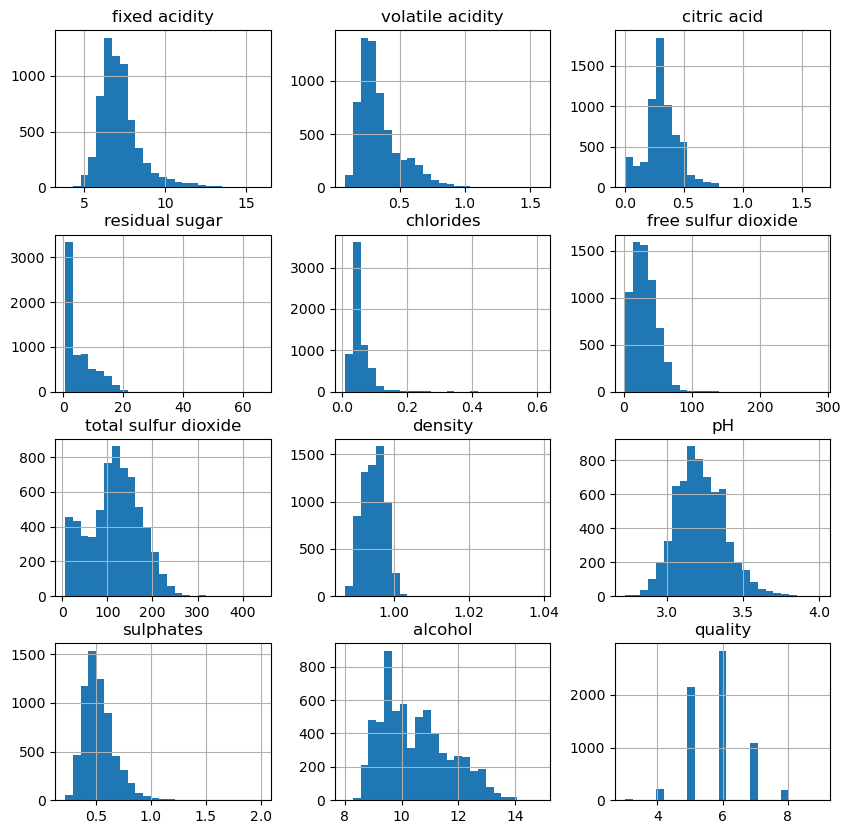

In [ ]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

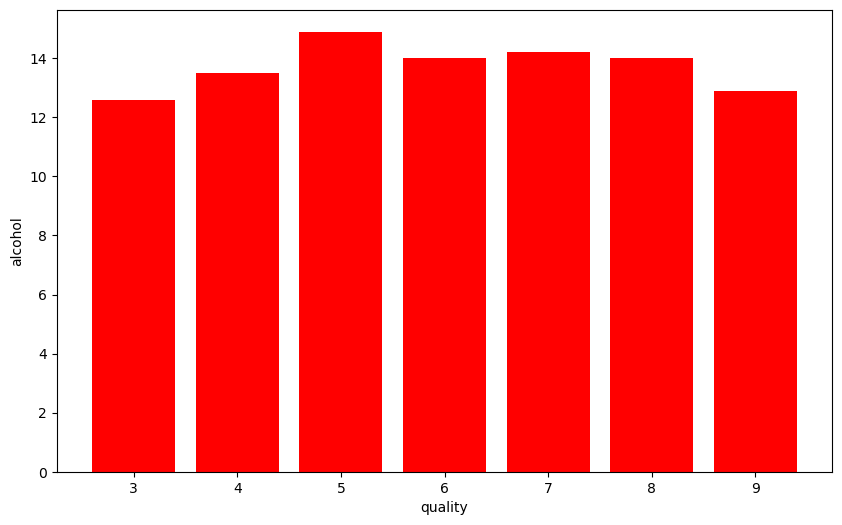

In [ ]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df.update(df.fillna(df.mean()))

C:\Users\venka\AppData\Local\Temp\ipykernel_12784\217285154.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.update(df.fillna(df.mean()))


In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['type'].value_counts(normalize=False)

white    4898
red      1599
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

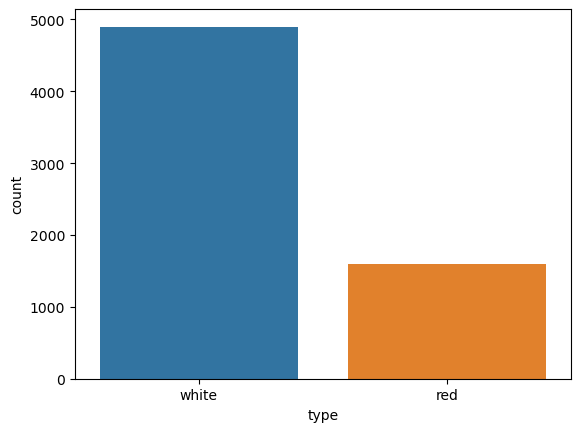

In [ ]:
sns.countplot(x="type",data=df)

IndexError: index 10 is out of bounds for axis 0 with size 10

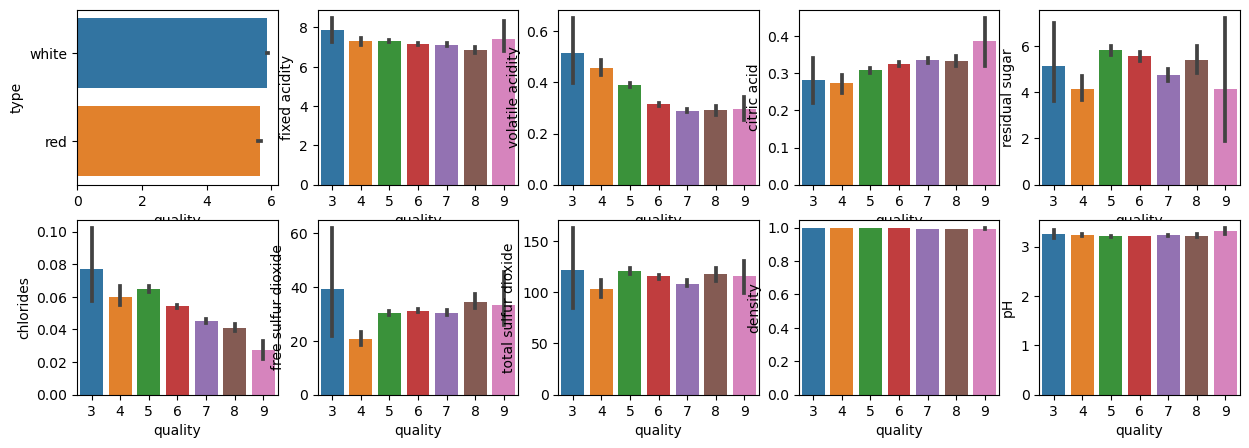

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index=0
for i in df.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

<AxesSubplot:>

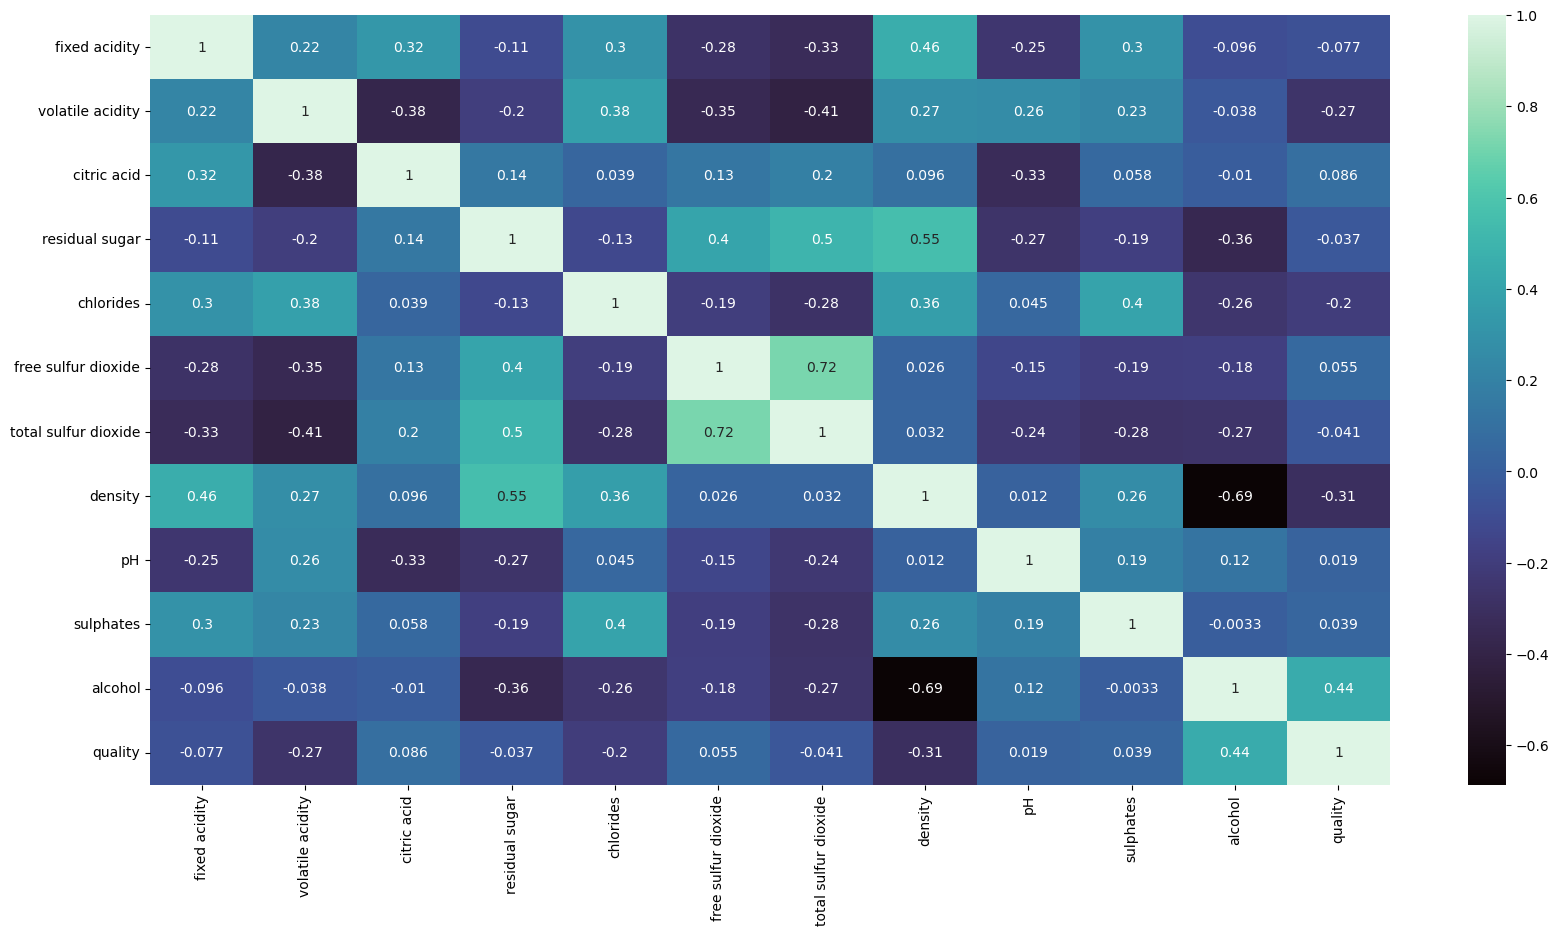

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='mako')

In [ ]:
df_ml=pd.get_dummies(df, drop_first=True)
df_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [ ]:
df_ml.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_white                uint8
dtype: object

In [ ]:
df_ml.dropna(inplace=True)
X = df_ml.drop('quality',axis=1)

In [ ]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type_white              0
dtype: int64

In [ ]:
Y=df_ml['quality'].apply(lambda y: 1 if y >= 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_standard = scaler.transform(X)

In [ ]:
scaler = StandardScaler()
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [ ]:
X = x_standard

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=123)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,8,6), activation='relu', solver='adam', max_iter=400, random_state=10)
mlp.fit(X_train,Y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))

[[3971  198]
 [ 540  488]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4169
           1       0.71      0.47      0.57      1028

    accuracy                           0.86      5197
   macro avg       0.80      0.71      0.74      5197
weighted avg       0.85      0.86      0.85      5197



## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
y_pred1 = model1.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,y_pred1))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred1, average='weighted', zero_division=0))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred1, average='weighted', zero_division=0))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred1, average='weighted', zero_division=0))

Accuracy Score: 0.8207692307692308
F1 Score: 0.7928493654514704
precision: 0.792244642284138
recall: 0.8207692307692308


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred2))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred2))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred2))

Accuracy Score: 0.8923076923076924
F1 Score: 0.6634615384615385
precision: 0.8263473053892215
recall: 0.5542168674698795


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred3))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred3))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred3))

Accuracy Score: 0.84
F1 Score: 0.5536480686695279
precision: 0.5944700460829493
recall: 0.5180722891566265


C:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## SVC

In [ ]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred4, average='weighted', zero_division=0))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred4, average='weighted', zero_division=0))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred4, average='weighted', zero_division=0))

Accuracy Score: 0.8292307692307692
F1 Score: 0.8011719154616307
precision: 0.8050889907664339
recall: 0.8292307692307692


## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train,Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred5))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred5))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred5))

Accuracy Score: 0.7261538461538461
F1 Score: 0.4840579710144927
precision: 0.3786848072562358
recall: 0.6706827309236948


## XGBoost

In [ ]:
import xgboost as xgb
model6 = xgb.XGBClassifier(random_state=1)
model6.fit(X_train, Y_train)
y_pred6 = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred6))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred6))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred6))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred6))

Accuracy Score: 0.8969230769230769
F1 Score: 0.6954545454545454
precision: 0.8010471204188482
recall: 0.6144578313253012


## Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation ='relu', input_shape =(None ,1, 12)))
model.add(Dense(9, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))
model.output_shape

model.summary()

model.get_config()

model.get_weights()
model.compile(loss ='binary_crossentropy',
optimizer ='adam', metrics =['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, None, 1, 12)       156       
                                                                 
 dense_6 (Dense)             (None, None, 1, 9)        117       
                                                                 
 dense_7 (Dense)             (None, None, 1, 1)        10        
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training Model
history=model.fit(X_train, Y_train, validation_split=0.1,epochs = 20,batch_size = 1, verbose = 1)

# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)


Epoch 1/20
4677/4677 [==============================] - 4s 764us/step - loss: 0.4300 - accuracy: 0.8065 - val_loss: 0.3835 - val_accuracy: 0.8212
Epoch 2/20
4677/4677 [==============================] - 3s 743us/step - loss: 0.3799 - accuracy: 0.8281 - val_loss: 0.3857 - val_accuracy: 0.8154
Epoch 3/20
4677/4677 [==============================] - 3s 734us/step - loss: 0.3732 - accuracy: 0.8326 - val_loss: 0.3713 - val_accuracy: 0.8135
Epoch 4/20
4677/4677 [==============================] - 3s 738us/step - loss: 0.3679 - accuracy: 0.8296 - val_loss: 0.3787 - val_accuracy: 0.8250
Epoch 5/20
4677/4677 [==============================] - 3s 729us/step - loss: 0.3651 - accuracy: 0.8315 - val_loss: 0.3840 - val_accuracy: 0.8212
Epoch 6/20
4677/4677 [==============================] - 4s 760us/step - loss: 0.3632 - accuracy: 0.8334 - val_loss: 0.3702 - val_accuracy: 0.8212
Epoch 7/20
4677/4677 [==============================] - 3s 735us/step - loss: 0.3598 - accuracy: 0.8339 - val_loss: 0.3686 -

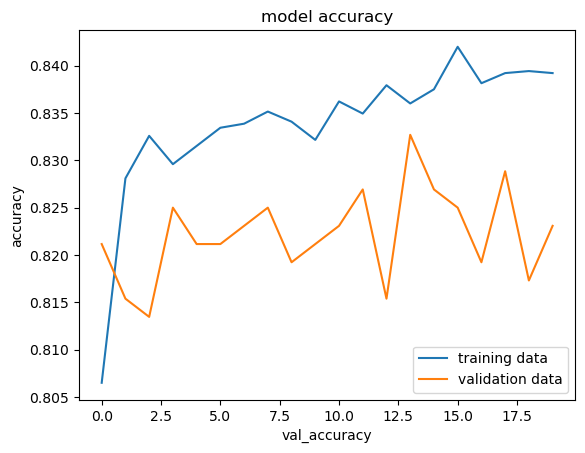

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')

plt.legend(['training data', 'validation data'], loc = 'lower right')

# 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12,activation='relu',input_dim=12))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=10)


Epoch 1/10
147/147 [==============================] - 1s 2ms/step - loss: 0.5977 - accuracy: 0.6739 - val_loss: 0.5018 - val_accuracy: 0.7750
Epoch 2/10
147/147 [==============================] - 0s 903us/step - loss: 0.4601 - accuracy: 0.8024 - val_loss: 0.4492 - val_accuracy: 0.8058
Epoch 3/10
147/147 [==============================] - 0s 946us/step - loss: 0.4310 - accuracy: 0.8129 - val_loss: 0.4280 - val_accuracy: 0.8173
Epoch 4/10
147/147 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8140 - val_loss: 0.4158 - val_accuracy: 0.8231
Epoch 5/10
147/147 [==============================] - 0s 902us/step - loss: 0.4085 - accuracy: 0.8163 - val_loss: 0.4073 - val_accuracy: 0.8212
Epoch 6/10
147/147 [==============================] - 0s 950us/step - loss: 0.4024 - accuracy: 0.8157 - val_loss: 0.4014 - val_accuracy: 0.8135
Epoch 7/10
147/147 [==============================] - 0s 952us/step - loss: 0.3973 - accuracy: 0.8153 - val_loss: 0.3974 - val_accuracy: 0.8

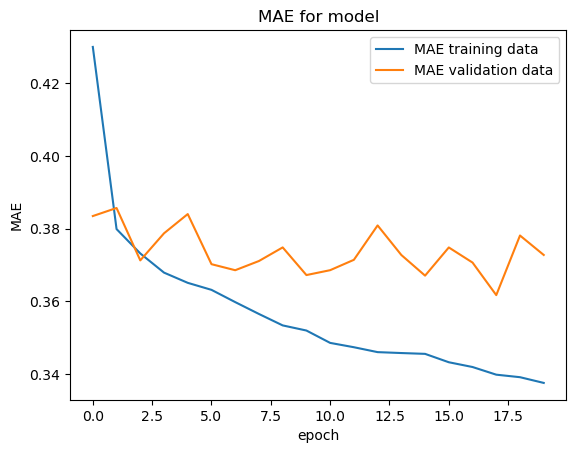

In [ ]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

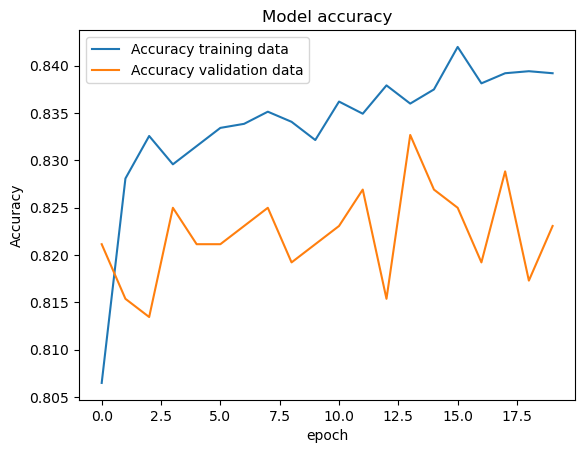

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

## ANN

In [ ]:
import tensorflow as tf
y_train_cat = tf.keras.utils.to_categorical(Y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(Y_test, 6)

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential(layers = None , name = None)
ann.add(tf.keras.layers.Input(shape =(None ,1, 12)))
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, None, 1, 16)       208       
                                                                 
 dense_13 (Dense)            (None, None, 1, 8)        136       
                                                                 
 dense_14 (Dense)            (None, None, 1, 6)        54        
                                                                 
Total params: 398
Trainable params: 398
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [ ]:
history = ann.fit(X_train, y_train_cat,  batch_size= 32, epochs = 75 , validation_data = (X_test,y_test_cat))

Epoch 1/75
163/163 [==============================] - 1s 2ms/step - loss: 1.1759 - accuracy: 0.6523 - val_loss: 0.6535 - val_accuracy: 0.8085
Epoch 2/75
163/163 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.8020 - val_loss: 0.4447 - val_accuracy: 0.8085
Epoch 3/75
163/163 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8118 - val_loss: 0.4048 - val_accuracy: 0.8146
Epoch 4/75
163/163 [==============================] - 0s 996us/step - loss: 0.4015 - accuracy: 0.8236 - val_loss: 0.3909 - val_accuracy: 0.8231
Epoch 5/75
163/163 [==============================] - 0s 983us/step - loss: 0.3916 - accuracy: 0.8245 - val_loss: 0.3838 - val_accuracy: 0.8262
Epoch 6/75
163/163 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8243 - val_loss: 0.3814 - val_accuracy: 0.8223
Epoch 7/75
163/163 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8276 - val_loss: 0.3782 - val_accuracy: 0.8285
Ep

163/163 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8474 - val_loss: 0.3574 - val_accuracy: 0.8162
Epoch 59/75
163/163 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8464 - val_loss: 0.3574 - val_accuracy: 0.8192
Epoch 60/75
163/163 [==============================] - 0s 969us/step - loss: 0.3320 - accuracy: 0.8491 - val_loss: 0.3613 - val_accuracy: 0.8154
Epoch 61/75
163/163 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8466 - val_loss: 0.3569 - val_accuracy: 0.8138
Epoch 62/75
163/163 [==============================] - 0s 979us/step - loss: 0.3315 - accuracy: 0.8476 - val_loss: 0.3564 - val_accuracy: 0.8215
Epoch 63/75
163/163 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8486 - val_loss: 0.3565 - val_accuracy: 0.8169
Epoch 64/75
163/163 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8474 - val_loss: 0.3583 - val_accuracy: 0.8300
Epoch 6

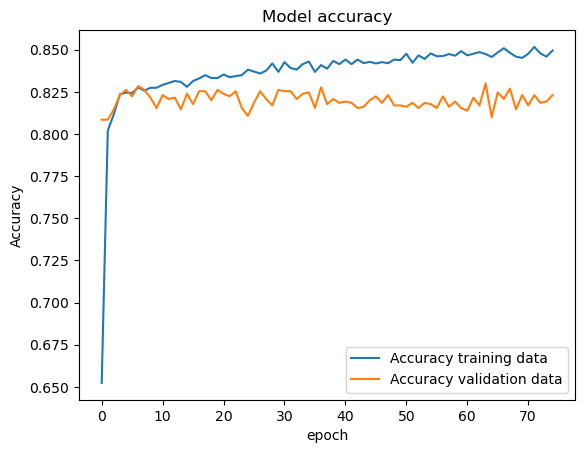

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

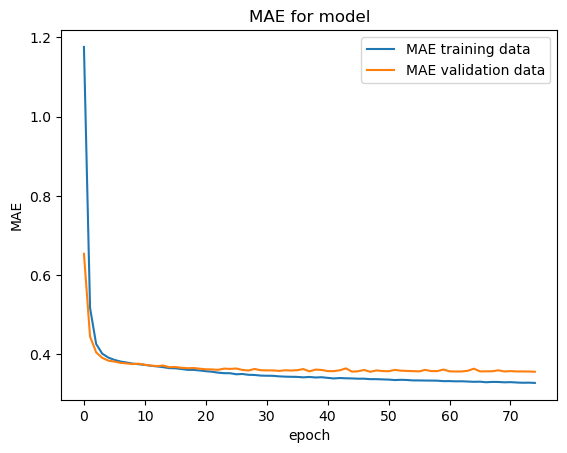

In [ ]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()